# CH05 오차역전파법
수치미분은 느림 따라서 조금더 효율적으로 계싼하는 오차역전파의 필요성
오차역전파 두가지를 통한 이해
* 그래프
* 수식

## 5.1 계산그래프

Computaional Graph 계산 그래프 : 이름 그대로 계산과정을 표현한 그래프  
복수의 노드와 에자(노드와 노드 사이의 직선)로 표현  

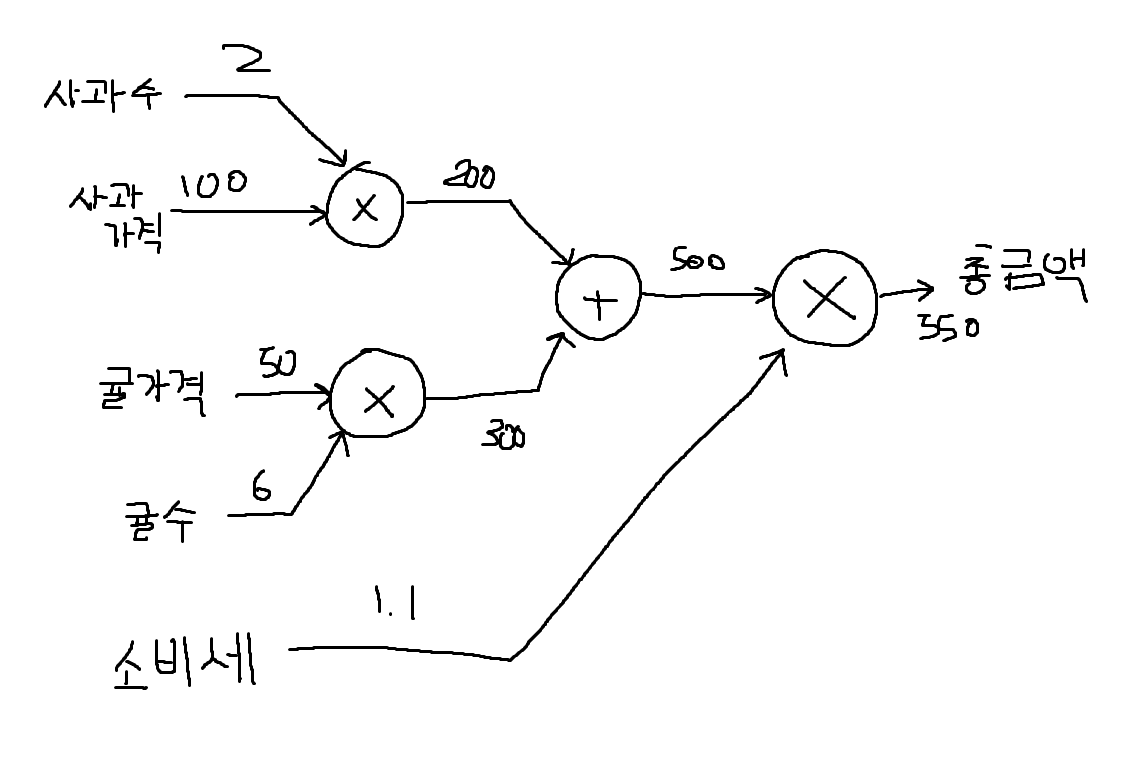

100원짜리 사과 2개와 50원짜리 귤 6개를 소비세 10%로 구매하였을때 총 금액  
이처럼 계산을 왼쪽에서 오른쪽으로 진행하는 단례를 **순전파**라 부름  
계산 그래프의 출발점부터 종착점으로의 전파  
이때 반대 방향으로 진행하는 것을 **역전파**라함

**국소적 계산**  
계산 그래프의 특징 : 국소적 계산을 전파함  

국소적 계산 : 자지 자신과 직접적으로 관계된 작음 범위만 계산  
위의 예시에서 여러 식품을 구매하더라도 추가적으로 무언가(감자)를 산다했을 때  
감자와 그 외의 물품 값을 더하는 계산은 500 + (감자가격) 만 계산하면 되고  
500이 어떻게 나왔는지는 신경쓰지 않는다는 뜻  

이처럼 계산 그래프는 전체 계산이 복잡한 것과는 별개로 해당노드의 국소적 계산에 집중  

**계산그래프의 이점**
* 국소적 계산 : 전체가 복잡해도 작은 것에만 집중하여 문제가 단순화 됨
* **미분을 효과적을 수행** : 순전파와 역전파를 이용해 각 변수의 미분을 효율적으로 구할 수 있음   
  역전파는 순전파와 반대 방향의 화살표로 그림  
이는 국소적 미분을 전달하고 그 미분 값은 화살표 아래에 적음  
역전파는 오른쪽에서 왼쪽으로 진행하며 미분값 전달 
1 -> 1.1 -> 2.2 를 얻을 수 있으며 사과가 1원이 오르면  
  최종금액은 2.2원이 오른다는 인사이트 얻을 수 있음  
이처럼 소비세에 대한 지불금액의 미분이나 사과 개수에 대한 지불 금액의 미분도 구할 수 있음  

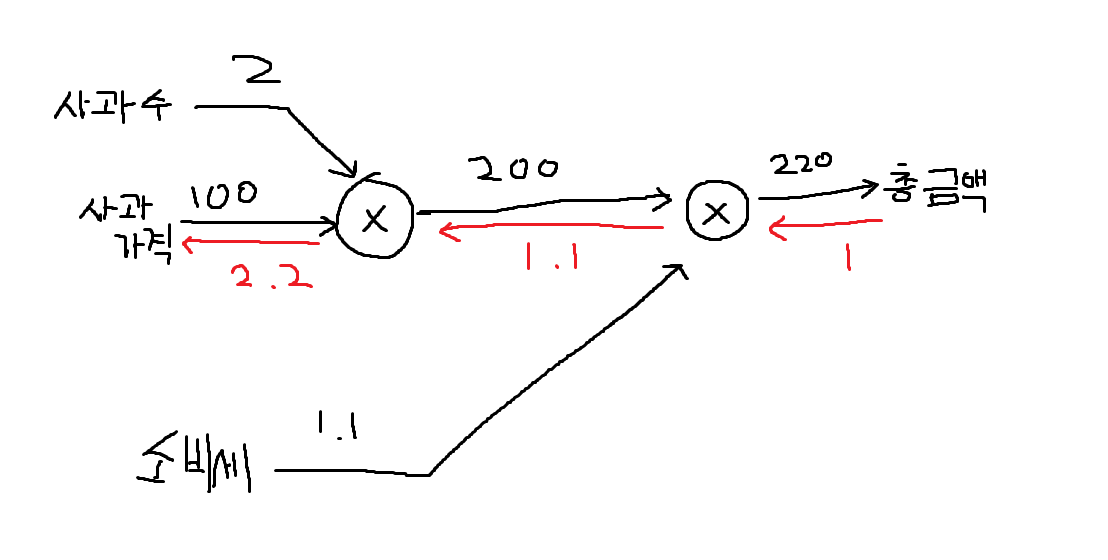

## 5.2 연쇄법칙

역전파가 국소적인 미분을 전달하는 원리는 연쇄법칙  
신호 E (상류에서 전달된 값)에 국소적 미분$(\frac{\partial y}{\partial x})$을 곱한 후 다음 노드로 전달하여 역전파 계산  

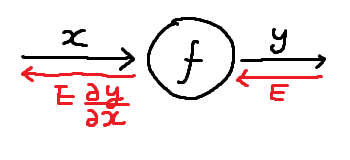

**연괘법칙이란?**  
합겅합수의 미분에 관한 성질 중 하나로 다음과 같이 정의 됨  
**합성함수의 미분은 합성함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다**  
$$ \frac{\partial z}{\partial x} = \frac{\partial z}{\partial y} \frac{\partial y}{\partial x} $$

**연쇄법칙과 계산 그래프**  
$ z = (x+y)^2$ 이라는 식이 있다고 하자  
이는 다음과 같이 분리가 가능하다  
$ z = t^2 $  
$ t = x + y $  
이때 x가 z에 얼마나 영향을 미치는지 알고싶다면 $\frac{\partial z}{\partial x}$를 알아야함  
이를 연쇄법칙의 계산 그래프에서 나타내면 다음 그림과 같음

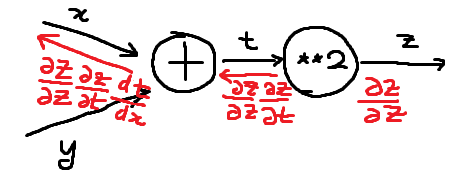

즉, $\frac{\partial z}{\partial z} = 1 $  
$\frac{\partial z}{\partial z} \frac{\partial z}{\partial t} = 1 * 2t = 2(x+y)$  
$\frac{\partial z}{\partial z} \frac{\partial z}{\partial t}\frac{\partial t}{\partial x} = 2(x+y)*1$

## 5.3 역전파

수식으로 역전파 설명  

### 덧셈 노드의 역전파

식 : $z = x + y$을 대상으로 역전파  
$$\frac{\partial z}{\partial x} = 1$$  
$$\frac{\partial z}{\partial y} = 1$$  
이 때 상류에서 전해진 미분을 $\frac{\partial L}{\partial z}$ 라하면 결과 적으로는  
x의 에자는 $\frac{\partial L}{\partial z} * 1$  
y의 에자는 $\frac{\partial L}{\partial z} * 1$  
을 각각 하류로 흘려보냄  

ex)  
10 + 5 = 10이라는 계산식이 있을 때(무관함)  
상류에서 1.7이 흘러온다면 각각 1.7 1.7을 하류로 흘러 보냄

즉, **덧셈노드는 역전파 입력신호를 다음노드로 출력할 뿐이기에 값을 그대로 하류노드로 전달한다**

### 곱셈 노드의 역전파

식 : $z = xy$을 대상으로 역전파  
$$\frac{\partial z}{\partial x} = y$$  
$$\frac{\partial z}{\partial y} = x$$  
이 때 상류에서 전해진 미분을 $\frac{\partial L}{\partial z}$ 라하면 결과 적으로는  
x의 에자는 $\frac{\partial L}{\partial z} * y$  
y의 에자는 $\frac{\partial L}{\partial z} * x$  
을 각각 하류로 흘려보냄  

ex)  
10 * 5 = 50이라는 계산식이 있을 때  
상류에서 1.7이 흘러온다면 각각 8.5 17을 하류로 흘러 보냄 

즉, **곱셈노드는 역전파 입력신호에 서로바꾼 값을 곱해 하류노드로 전달한다**

## 5.4 단순한 계층 구현하기

앞서 보았던 사과 쇼핑의 예를 구현  
덧셈노드 : AddLayer()  
곱셈노드 : MulLayer()  
순전파 : forward()  
역전파 : backward()

In [1]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self,x,y):
        self.x = x
        self.y = y
        out = x*y

        return out

    def backward(self, dout):
        dx = dout * self.y # 미분 직적 수행잉 아닌 이미 계산된 식 사용
        dy = dout * self.x

        return dx,dy

순전파

In [2]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


역전파

In [3]:
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


덧셈계층  
역전파에서 사용되지 않으므로 __init__ 초기화가 필요 없음

In [4]:
class AddLayer:
    def __init__(self):
        pass

    def forward(self,x,y):
        out = x+y
        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx,dy

두 계층을 합쳐서 사과와 귤을 사는 상황을 구현

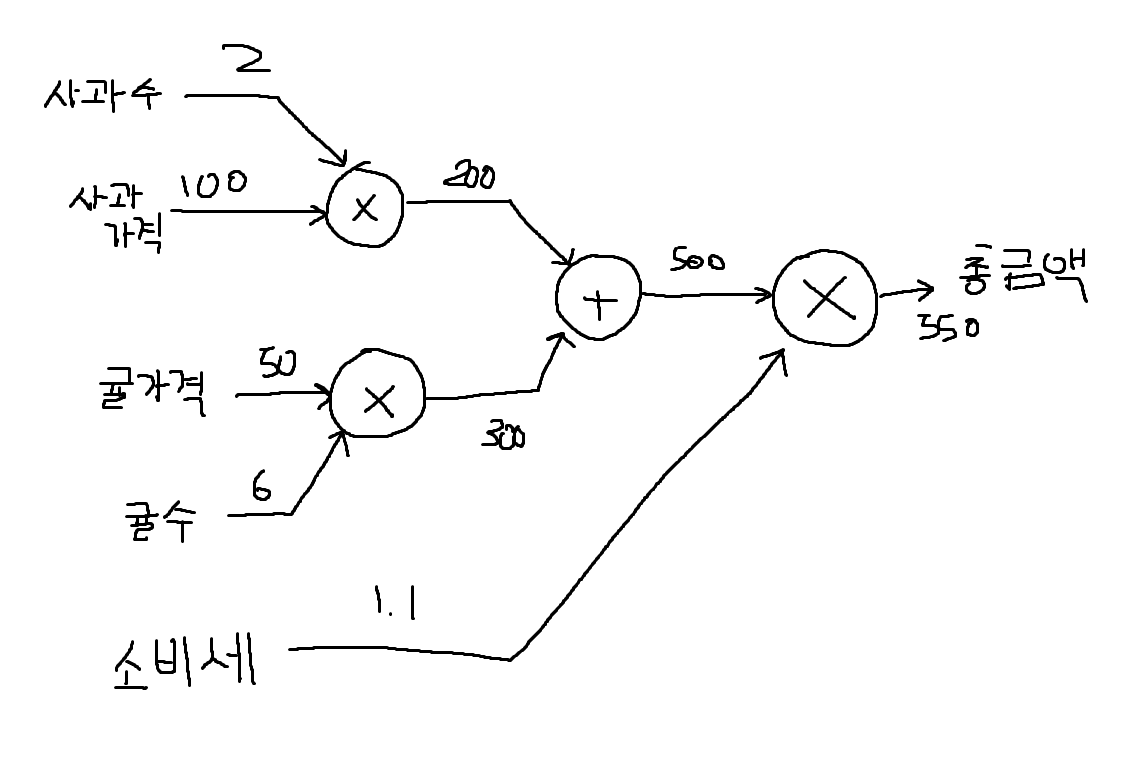

In [5]:
apple = 100
apple_num = 2
tangerine = 50
tangerine_num = 6
tax = 1.1

mul_apple_layer = MulLayer()
mul_tangerine_layer = MulLayer()
add_apple_tangerine_layer = AddLayer()
mul_tax_layer = MulLayer()

apple_price = mul_apple_layer.forward(apple,apple_num)
tangerine_price = mul_tangerine_layer.forward(tangerine,tangerine_num)
price = add_apple_tangerine_layer.forward(apple_price, tangerine_price)
cost = mul_tax_layer.forward(price,tax)

dprice = 1
dprice, dtax = mul_tax_layer.backward(dprice)
dapple_price, dtangerine_price = add_apple_tangerine_layer.backward(price)
dtangerine, dtangerine_num = mul_tangerine_layer.backward(dtangerine_price)
dapple, dtangerine_num = mul_apple_layer.backward(dapple_price)

print(cost)
print(dapple_num, dapple, dtangerine, dtangerine_num, dtax)

550.0
110.00000000000001 1000 3000 50000 500


## 5.5 활성화 함수 계층 구현하기

### **RELU계층**  
$
y = \begin{cases}
x && (x>0) \\
0 && (x<=0)
\end{cases}
$  
이를 미분 시  
$
\frac{\partial y}{\partial x} = \begin{cases}
1 && (x>0) \\
0 && (x<=0)
\end{cases}
$  
따라서 역전파 시  
x>0이면 상류의 값을 그대로 하류로 흘리고  
x<=0이면 하류의 값으로 0을 전달

In [6]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x<=0)
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

**forward 순전파**  
x : 넘파이 배열  
mask : x의 원소들 중 0 이하인 것들을 찾아 True/False로 구성된 넘파이 배열로 저장(역전파에 사용)  
copy : 원본은 복사본을 만듦  
out[self.mask] = 0 : mask에서 True(0이하인 곳)의 값을 0으로 초기화  
----(Numpy의 불리언 인덱싱, true인 값에 한해서 골라적용)

**backward 역전파**  
dout[self.mask] = 0 : 순전파일때 0 이하였던 값들을 역전파일떄도 미분값을 0으로 만듦  

### Sigmoid 계층

시그모이드 식은  
$$y = \frac{1}{1+e^{-x}}$$  
이는 국소적인 계싼의 전파로 이루어짐  
* x에 -1 곱하고 ('*'노드)
* exp에 대입하고 (exp노드)
* 1더하고 ('+'노드)
* 1에 나눠주기 ('/'노드)  
이 각각을 노드로 생각하여 계산과정 설계

### **1단계('/'노드) :**  
$$ y = \frac{1}{x} $$
$$ \frac{\partial y}{\partial x} = -\frac{1}{x^2} = -y^2$$
따라서 역전파에서 흘러온 값에 순전파의 출력을 제곱한 값에 - 붙여 하류로 전달

### **2단계('+'노드):**  
식 : $z = x + y$을 대상으로 역전파  
$$\frac{\partial z}{\partial x} = 1$$  
$$\frac{\partial z}{\partial y} = 1$$  
이 때 상류에서 전해진 미분을 $\frac{\partial L}{\partial z}$ 라하면 결과 적으로는  
x의 에자는 $\frac{\partial L}{\partial z} * 1$  
y의 에자는 $\frac{\partial L}{\partial z} * 1$  
다라서 상류의 값 여과 없이 흘려보냄

### **3단계 ('exp'노드) :**  
$$ \frac{\partial y}{\partial x} = e^x$$  
따라서 상류의 값에 그냥 $e^x$ 곱해서 흘려보냄  

### **4단계('*'노드) :**  
$$\frac{\partial z}{\partial x} = y$$  
$$\frac{\partial z}{\partial y} = x$$  
이 때 상류에서 전해진 미분을 $\frac{\partial L}{\partial z}$ 라하면 결과 적으로는  
x의 에자는 $\frac{\partial L}{\partial z} * y$  
y의 에자는 $\frac{\partial L}{\partial z} * x$  
즉 둘을 바꾼 값을 각각 하류로 흘려보냄  

### **Sigmoid의 역전파**
1~4단계를 종합하여 중간과정을 모두 묶어 하나의 sigmoid로 종합  
즉,  $$\frac{\partial L}{\partial y}$$를, Sigmoid 역전파 시  
$$\frac{\partial L}{\partial y} y^2 e^{-x}$$  
이는 $y = \frac{1}{1+e^{-x}}$라고 계산한 것이므로 다음과 같이 고쳐 쓸 수 있고  
$$ \frac{\partial L}{\partial y} \frac{1}{1+e^{-x}} \frac{e^{-x}}{1+e^{-x}}$$이는 곧 다음 결론과 같음
$$ \frac{\partial L}{\partial y} y(1-y) $$  
즉, Sigmoid계층의 역전파는 순전파의 출력만으로 계산할 수 있음

In [7]:
class Sigmoid:
    def __init__(self):
        self.out - None

    def forward(self,x):
        out = 1 / (1+np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

## 5.6 Affine/Softmax 계층 구현하기

### Affine 계층

Affine : 신경망의 순전파 때 수행하는 행렬의 곱연산(기하학 용어)
신경망에서는 가중치 신호의 총합을 계산하기 위해 행렬곱(np.dot(X,W)+B)을 사용  
이를 계산해주는 계층  

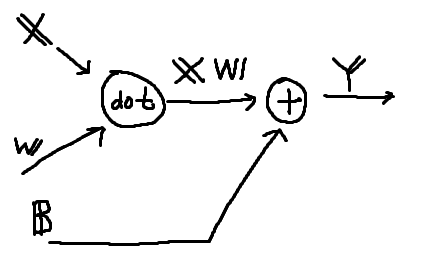

이때 X,W,B는 각각 행렬임을 주의  
지금까지 계산그래프에소는 노드사이에 스칼라값이 흘렀는 데 반해  
이제부터는 행렬이 흐름

이 연산도 결국 행렬의 원소 기준으로 보았을 때  
지금까지 사용한 스칼라 값에 대한 연산과 유사함  
$$ \frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}*W^T$$  
모양 맞춰주기로 생각하면 편함

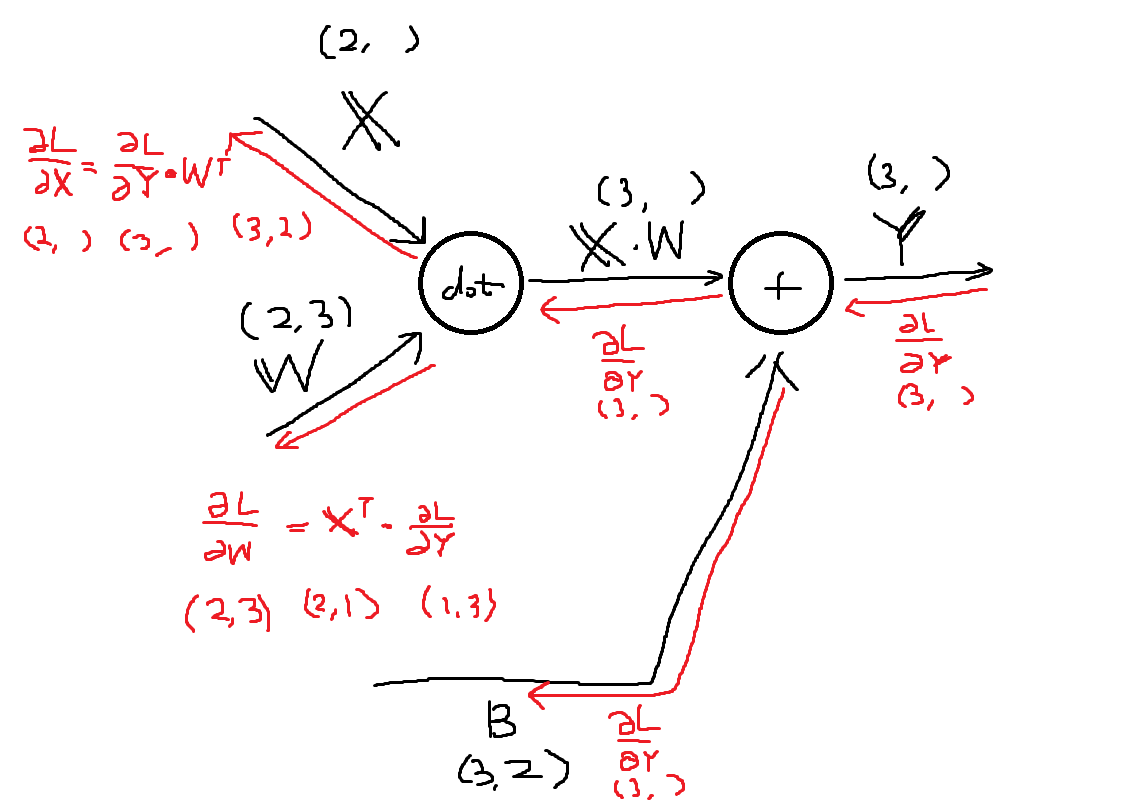

$X$와 $ \frac{\partial L}{\partial X}$ 는 같은 형상으로 맞춰주는 것처럼 형상에 유의해야함  
배치용으로 다시 만든다하면 X의 shape이 (N,2)로 바뀜

In [8]:
class Affine:
    def __init__(self, W,b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self,x):
        self.x = x
        out = np.dot(x,self.W) +self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout,self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout,axis=0)
        return dx

**Softmax-with-loss 계층**  
지금까지의 모델은 Affine -> RelU -> Affine -> RelU -> ... -> Affine으로 점수 반환  
이를 확률로 변환 시키기 위해 Softmax사용 필요  

손실함수인 교차엔트로피 오차도 포함하여 Softmax-with-loss 계층 제작  

**순전파**  
Softmax의 식은 $$ y_k = \frac{e^{a_k}}{\sum_\limits{i=1}^n e^{a_i}} $$
이므로 그 전 노드들을 모두 exp()에 대입하여 합하고, 각각을 반환해야한다

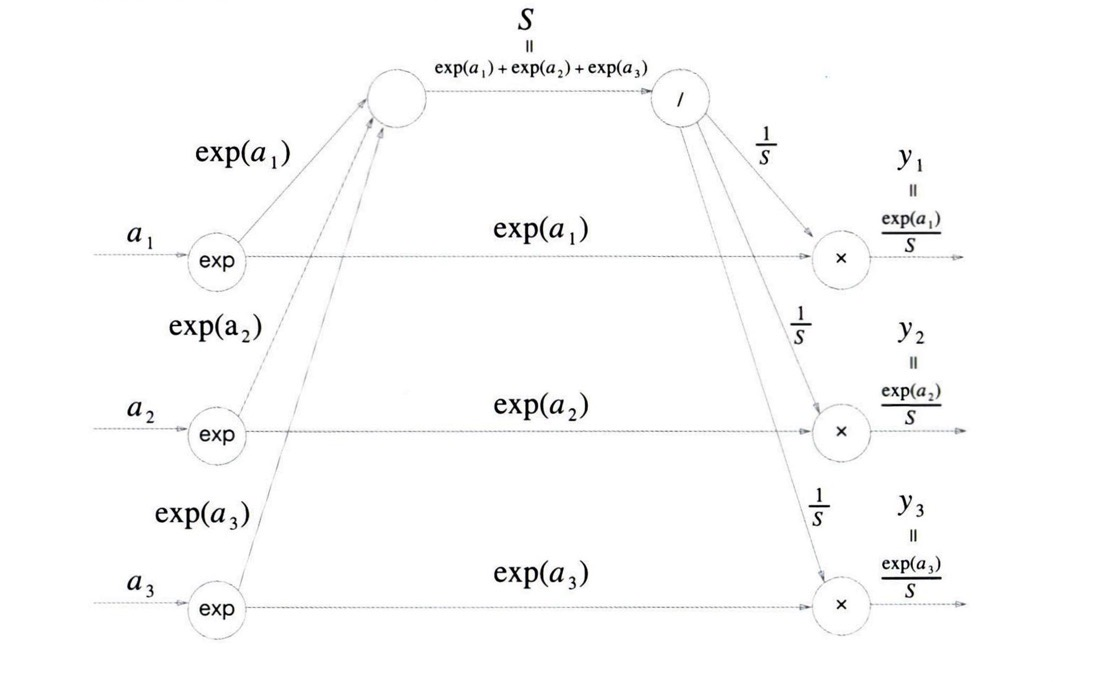

CrossEntropyError (CEE)는 다음과 같으므로 그래프로 표현시 그림과 같음  
$$ E = -\sum_{k}t_klog(y_k) $$
$$ t_k = \text{정답레이블} $$
$$ y_k = \text{모델예측값} $$
$$ k = \text{출력층의 노드 수} $$

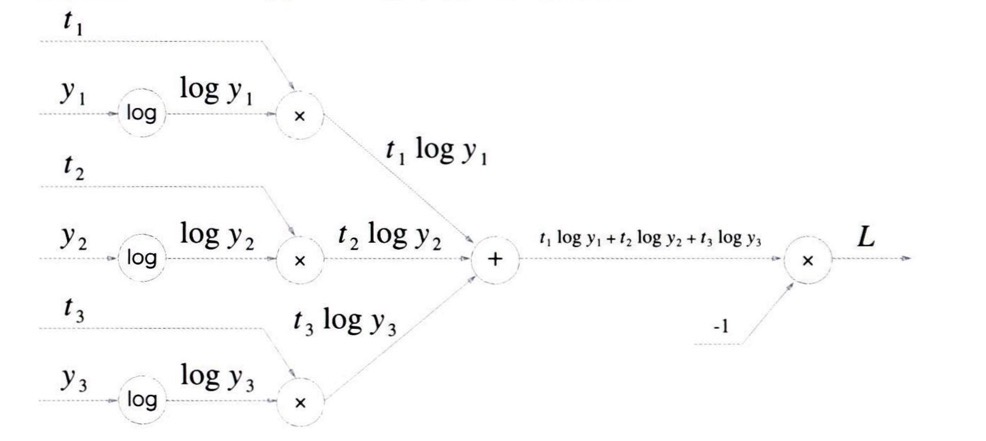

**역전파**  
교차엔트로피 오차를 역전파로 표현하라면 앞서 보았던  
곱하기(입력 크로스로 곱해서 흘림), 더하기(상류그대로 흘림) 연산과 더불어   
log를 계산해주어야함  
### **log 연산**
$$y = log(x)$$
$$\frac{\partial y}{\partial x} = \frac{1}{x}$$
이므로 상류에 순전파 입력의 역수 곱해서 하류로 흘림

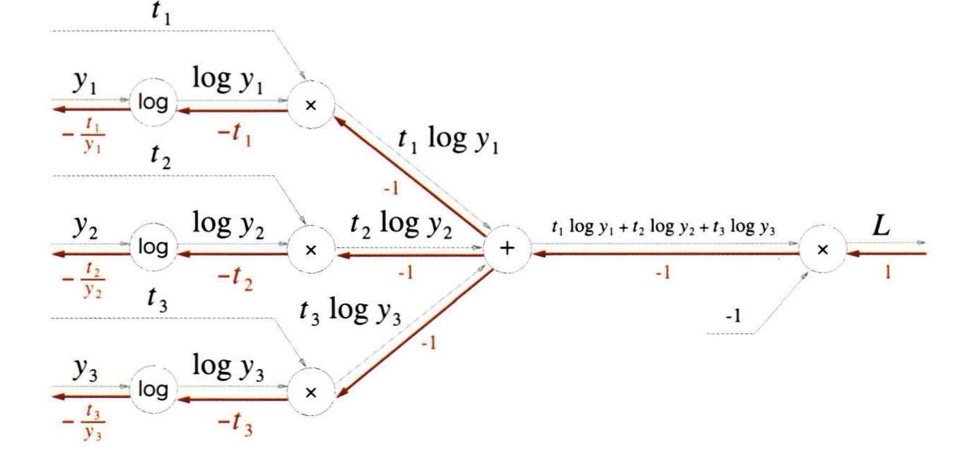

$$y_k = \frac{exp(a_k)}{S}$$로 상정하였으므로 *노드를 통과할때 들어온 두 입력을 교차로 곱한것을 표기하면 각각 $$ - \frac{S}{exp(a_k)} t_k * exp(a_k) = -t_kS$$
$$ - \frac{S}{exp(a_k)} t_k \frac{1}{S} = - \frac{t_k}{exp(a_k)} $$
이때 $$ \sum_k -t_kS = S \text{  (t는 정답레이블 1 하나와 0으로 구성)}$$ 이므로 다음 그래프 성립

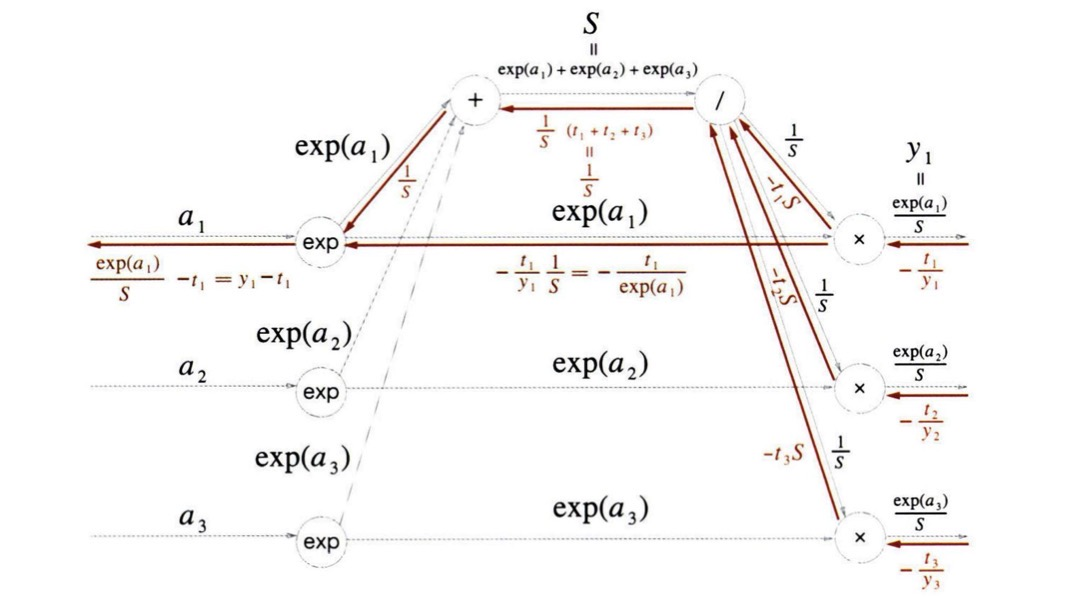

둘을 연결시켜 표기하면 다음과 같음

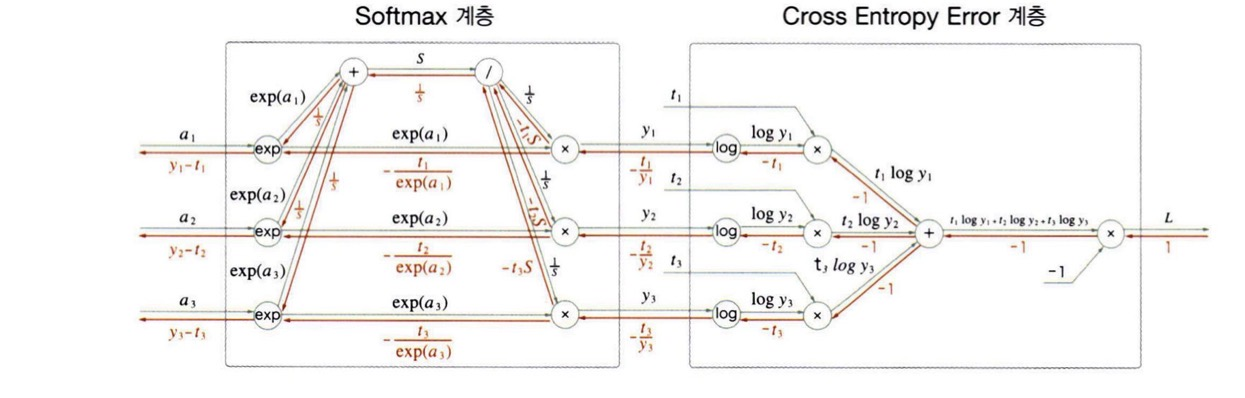

그림이 복잡하므로 실제 순전파 역전파에 사용되는 값들만을 남기고 모두 날려준 간소화 된 최종 그림은 다음과 같음

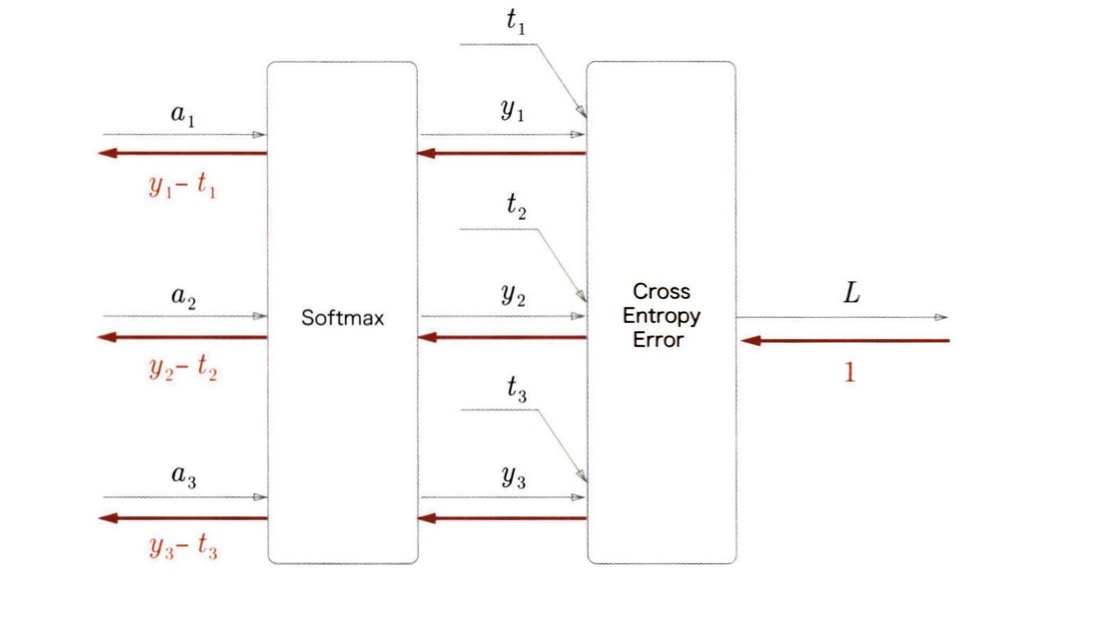

신경망학습의 목적은 신경망의 출력이 정답레이블과 가까워지도록 값을 조정하는 것  
$y_k - t_k$의 형식은 Softmax계층의 출력과 정답레이블의 차이로 신경망의 현재출려과 정답레이블 오차를 있는그대로 드러냄  
Softmax-with-loss 계층 방식은 오차에 대해 큰 손실값을 주기에 학습에 좋음

In [9]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        slef.t = None

    def forward(self,x,t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y,self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx

## 5.7 오차역전파법 구현

앞절에서 구현한 계층들을 종합하여 신경망 구축  

**Step 0**  
전제 : 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 휸련데이터에 적응하도록 조정하는 과정을 '학습'이라 부름  
**Step 1 : 미니배치**  
훈련데이터 중 일부를 무작위로 가져와 그 미니배치의 손실함수값을 줄이는 것이 목표  
**Step 2 : 기울기 산출**  
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함. 기울기는 손실함구의 값을 가장 작게하는 방향을 제시  
**Step 3 : 매개변수 갱신**  
가중치 매개변수를 기울기 방향으로 아주조금씩 갱신  
**Step 4 : 반복**  
Step 1~3반복

### 신경망 구현

우선 클래스를 기획

| 인스턴스 변수 | 설명 |
| :--- | :--- |
| params | 딕셔너리 변수로 신경망의 매개변수 보관 <br> ex) params['W1']은 1번째 층의 가중치, params['b1']은 1번째 층의 편향|
| layers | 순서가 있는 딕셔너리 변수로, 신경망의 계층을 보관 <br> ex) layers['Affine1'],layers['Relu1'],layers['Affine2']와 같이 계층 수선 유지|
| lastLayer | 신경망의 마치막 계층 <br> 여기서는 SoftMaxWithLoss|

| 메서드 | 설명 |
| :--- | :--- |
| __init__(self, | 초기화 수행 |
| input_size, | 입력층 뉴련 수 |
| hidden_size, | 은닉층 뉴련 수 |
| output_size, | 출력층 뉴런 수 |
| weight_init_std) | 가중치 초기화 시 정규분포 스케일 |
| predict(self, x) | 예측 수행 <br> x는 이미지 데이터 |
| loss(self, x, t) | 손실함수 값 구함 <br> x는 이미지 데이터  <br> t는 정답레이블 |
| accuracy(self, x, t) | 정확도 계산 |
| numerical_gradient(self, x, t) | 가중치 매개변수 수치미분방식으로 기울기 구함 |
| gradient(self, x, t) | 가중치 매개변수 오차역전파법으로 기울기 구함 |

In [14]:
import sys, os
sys.path.append(os.pardir)
import numpy as np

from dataset.mnist import load_mnist
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size,hidden_size, output_size, weight_init_std=0.01):
        self.params={}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        #OrderedDict는 순서가 있는 딕셔너리
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'],self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        #각계층의 forward를 호출하여 예측(순전파)
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y,t)

    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)

        if t.ndim != 1: #ndim은 차원의 수를 나타냄
            t = np.argmax(t,axis=1) #즉, 원핫 인코딩으로 되어 있으면 인덱스 값을 가져오라는 뜻

        accuracy = np.sum(y==t) / float(x.shape[0])

        return accuracy

    def numerical_gradient(self,x,t):
        loss_W = lambda W:self.loss(x,t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self,x,t):
        #순전파
        self.loss(x,t) 

        #역전파
        dout = 1
        dout = self.lastLayer.backward(dout)
        #계층을 반대순서로 호출해야함
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db

        return grads

이처럼 계층으로 구현한 다음 신경망을 쉽게 구축 할 수 있음

### 기울기 검증

기울기 구하는 방법 두가지
* 수치미분
* 해석적 방법(오차역전파)

수치미분은 느린대신 구현에 오류가 생기기 쉽지 않음  
따라서 수치미분으로 오차역전파법을 정확히 구현하였는지 확인 필요  
이 작업을 **기울기 확인**이라 부름

In [15]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50,output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ":" +str(diff))

W1:4.07036158893911e-10
b1:2.30711890472884e-09
W2:6.0178178983228875e-09
b2:1.4032444244221898e-07


### 학습 구현

In [17]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50,output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size) #(범위, 개수)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    #오차역전파로 기울기 얻음
    grad = network.gradient(x_batch, t_batch)

    #갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -=learning_rate*grad[key]

    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc,test_acc)

0.11806666666666667 0.1219
0.9051833333333333 0.9085
0.925 0.9272
0.9382166666666667 0.9363
0.9449166666666666 0.9428
0.9524166666666667 0.9513
0.9573 0.9556
0.9599333333333333 0.9562
0.9652166666666666 0.9603
0.9688 0.9632
0.9699333333333333 0.9648
0.9724833333333334 0.9664
0.9732833333333333 0.9669
0.9763833333333334 0.9688
0.9781 0.9689
0.9783166666666666 0.9697
0.9796833333333334 0.9703


## 5.8정리

* 계산 그래프를 이용하면 계산과정을 시각적으로 파악 할 수 있음
* 계산 그래프의 노드는 국소적 계싼으로 구성됨(이를 조합하여 전체 그림 완성)
* 계산 그래프의 순전파는 통상의 계산을 수행함
* 계산 그래프의 역전파는 각 노드의 미분을 구할 수 있음
* 신경망의 구성 요소를 계층으로 구현하여 기울기를 효율적으로 계산 가능(오차역전파법)
* 수치미분과 오차역전파법의 결과를 비교하여 오차역전파법의 구현에 이상이 없는지 체크(기울기 확인)